## Imports

In [1]:
# type: ignore on
!pip install -q tensorflow
!pip install -q matplotlib
# type: ignore off
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [2]:
dataset = keras.datasets.fashion_mnist
((x_training, y_training), (x_test, y_test)) = dataset.load_data()
print(x_training.shape)
y_training.min(), y_training.max()

(60000, 28, 28)


(0, 9)

## Show data

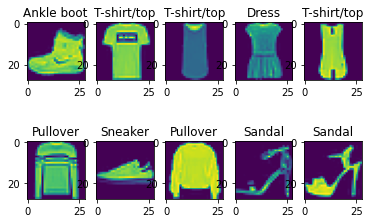

In [3]:
classification = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for image in range(10):
    plt.subplot(2, 5, image + 1)
    plt.imshow(x_training[image])
    plt.title(classification[y_training[image]])

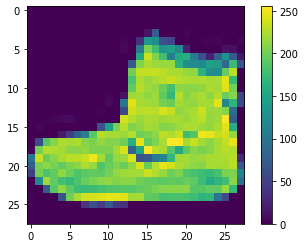

In [4]:
plt.imshow(x_training[0])
plt.colorbar()

## Data normalization

In [5]:
x_training = train_images = x_training / float(255)

## Creating, training and normalizing the model

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(len(classification), activation = 'softmax'),
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

model_history = model.fit(x_training, y_training, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5324 - accuracy: 0.8104 - val_loss: 0.4367 - val_accuracy: 0.8405
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3984 - accuracy: 0.8548 - val_loss: 0.3695 - val_accuracy: 0.8638
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3649 - accuracy: 0.8670 - val_loss: 0.3719 - val_accuracy: 0.8683
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3404 - accuracy: 0.8762 - val_loss: 0.3457 - val_accuracy: 0.8756
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3235 - accuracy: 0.8807 - val_loss: 0.3362 - val_accuracy: 0.8797


## Saving/loading model

In [7]:
model.save('cloath_classification.h5')
saved_model = keras.models.load_model('cloath_classification.h5')

## Ploting accuracy by epoch

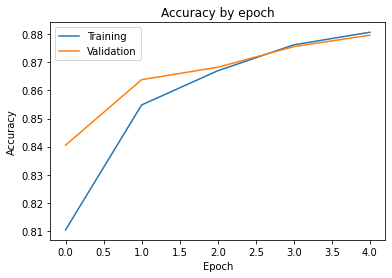

In [8]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Accuracy by epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])

## Ploting loss by epoch

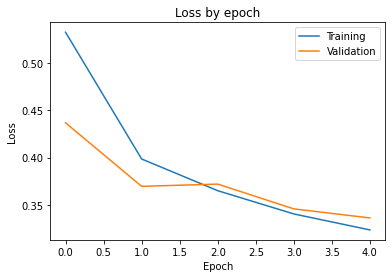

In [9]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss by epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])

## Model testing 

In [44]:
tests = model.predict(x_test)
result_test = classification[np.argmax(tests[10])]
validation_test = classification[y_test[10]]
print('Result test:', result_test)
print('Validation test:', validation_test)

Result test: Coat
Validation test: Coat


In [11]:
saved_model_tests = saved_model.predict(x_test)
saved_model_result_test = classification[np.argmax(saved_model_tests[10])]
saved_model_validation_test = classification[y_test[10]]
print('Result test:', saved_model_result_test)
print('Validation test:', saved_model_validation_test)

Result test: Coat
Validation test: Coat


## Model validation

In [45]:
test_loss, accuracy_loss = model.evaluate(x_test, y_test, batch_size = 1)
print('Test loss:', test_loss)
print('Test accuracy:', accuracy_loss)

10000/10000 [==============================] - 9s 899us/step - loss: 997.6274 - accuracy: 0.7472
Test loss: 997.6273803710938
Test accuracy: 0.7472000122070312


In [13]:
saved_model_test_loss, saved_model_accuracy_loss = saved_model.evaluate(x_test, y_test, batch_size = 1)
print('Test loss:', saved_model_test_loss)
print('Test accuracy:', saved_model_accuracy_loss)

10000/10000 [==============================] - 6s 574us/step - loss: 59.9363 - accuracy: 0.8539
Test loss: 59.93633270263672
Test accuracy: 0.8539000153541565
